In [1]:
import numpy as np

In [2]:
import pandas as pd
import os
import glob
import shutil
import numpy as np
import scipy.signal as signal

In [3]:
# High-pass then Band-pass filter
def hpbp_filter_signal(complex_img, high_cut=0.0005, low=0.008, high=0.1):
  """
  : Description :   Filter image with High-pass filter then filter with band-pass filter
  : Input :
    - complex_img   2D array of complex number
    - high_cut      maximum frequency to collect from high-pass filter
    - low           minimum frequency to collect from band-pass filter
    - high          maximum frequency to collect from band-pass filter
  : Output :
    - filter_img    result image after filtering
  """
  # === High-pass filter === #
  filter_order = 3
  b, a = signal.butter(filter_order, high_cut, 'high')
  hp_img = signal.filtfilt(b, a, complex_img)

  # === Band-pass filter === #
  img_fft = np.fft.fft2(hp_img)
  low_cutoff = low
  high_cutoff = high

  # Create a mask for the filter function
  ny, nx = img_fft.shape
  u, v = np.meshgrid(np.fft.fftfreq(nx), np.fft.fftfreq(ny))
  d = np.sqrt(u**2 + v**2)
  mask = np.logical_and(d > low_cutoff, d < high_cutoff)

  # Apply the filter to the Fourier transform
  bp_img = img_fft * mask

  # Compute the inverse Fourier transform to get the filtered image
  filter_img = np.fft.ifft2(bp_img).real
  return filter_img

In [4]:
import matplotlib.pyplot as plt

NameError: name 'file_list' is not defined

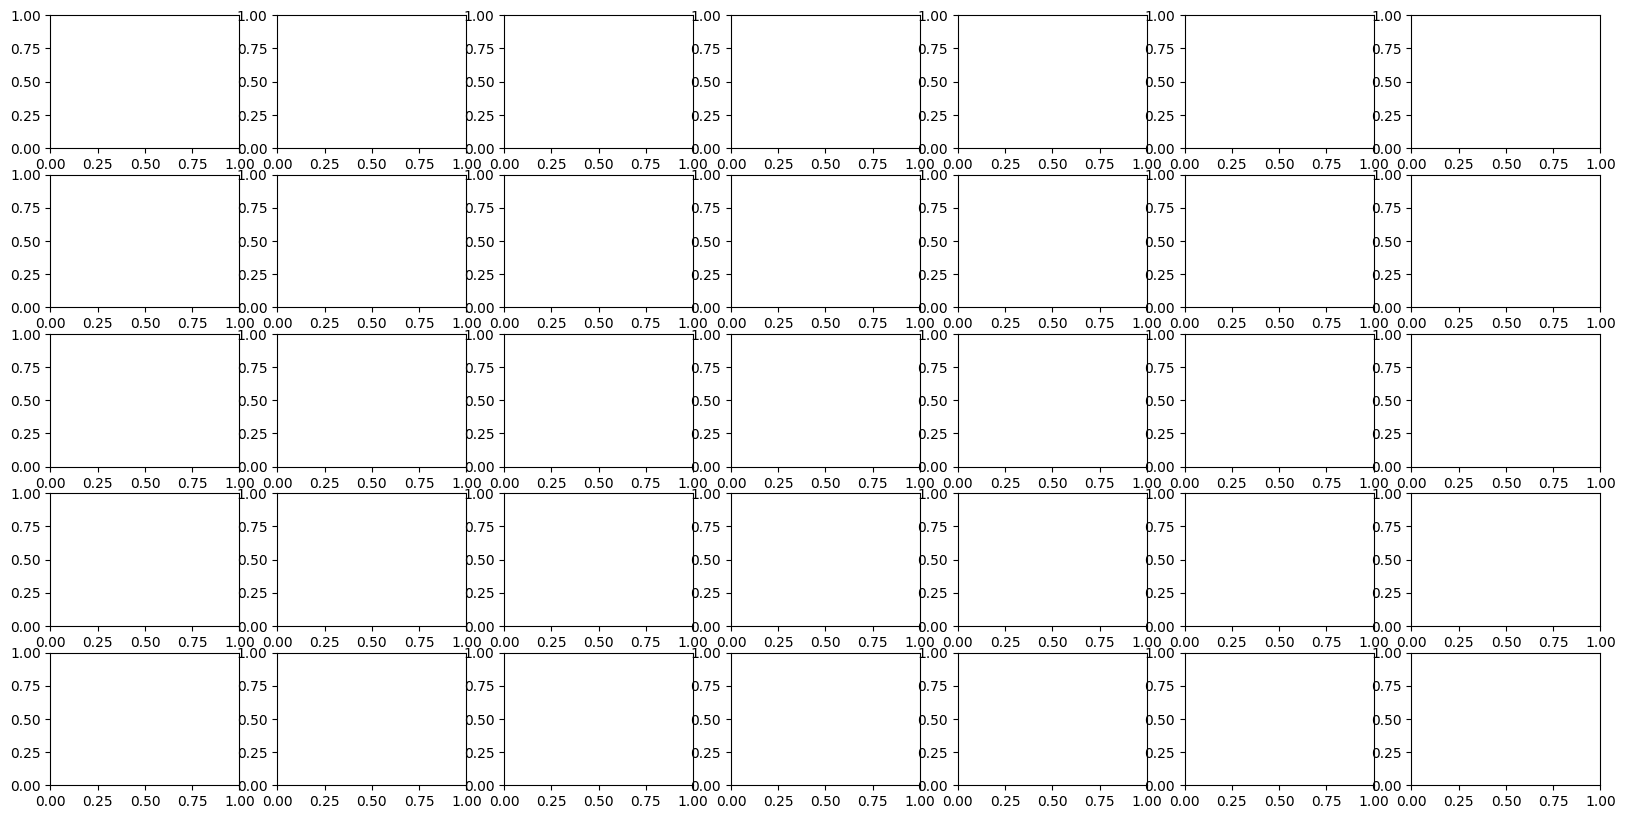

In [5]:
fig, axs = plt.subplots(5, 7, figsize=(20, 10))

# Iterate over the images and plot each one
for i in range(5):
  for j in range(7):
    sample_img = np.load(file_list[j][i])
    sample_img = np.transpose(sample_img)
    distance_img = np.abs(sample_img)
    filter_img = hpbp_filter_signal(distance_img, 0.004, 0.0001, 1)
    filter_img = filter_img.clip(min=0)
    axs[i][j].imshow(filter_img, cmap='jet', aspect='auto')
    if i==0:
      axs[i][j].set_title(class_name[j])
plt.tight_layout()
plt.show()

In [6]:
sample_img = np.load(r'train_new\0b32f114-f92a-4b9d-aa81-66b027f9bb52.npy')
sample_img = np.transpose(sample_img)
sample_img[:8,500:1250].shape

(8, 750)

In [7]:
labels = pd.read_csv('label_application.csv')

In [8]:
labels.head()

,id,label
0,03112dd6-0a3c-407d-b7bd-4d0e8b81d7b5,120
1,e9afb3f9-1bce-4165-8c95-7d0cc0b3394f,110
2,b8b0b4df-989f-4deb-97cb-cdc084ae4bcc,120
3,e9ed6753-1a1a-4ab9-a36e-b20e2ee650f8,120
4,79299830-83be-4447-a527-71a8bb3635ed,150


In [9]:
map = []
for i in range(len(labels)):
    path = labels["id"][i]+'.npy'
    path2 = os.path.join("train_new",path)
    pair = [path2, labels["label"][i]]
    map.append(pair)
    

In [10]:
map[0][0]

'train_new\\03112dd6-0a3c-407d-b7bd-4d0e8b81d7b5.npy'

In [11]:
for i in map:
    print(i[0])

train_new\03112dd6-0a3c-407d-b7bd-4d0e8b81d7b5.npy
train_new\e9afb3f9-1bce-4165-8c95-7d0cc0b3394f.npy
train_new\b8b0b4df-989f-4deb-97cb-cdc084ae4bcc.npy
train_new\e9ed6753-1a1a-4ab9-a36e-b20e2ee650f8.npy
train_new\79299830-83be-4447-a527-71a8bb3635ed.npy
train_new\a298cbf4-6eb9-4744-9efb-578f2de03a22.npy
train_new\7ceda165-b443-4a51-b2b3-6c5949067ab9.npy
train_new\e7f1b979-a26b-4cce-a092-c547fa46d27e.npy
train_new\30f2c012-5ef6-4e03-90cf-dba7e71edd18.npy
train_new\9e684936-9a4b-4d19-9b03-d51fd6097023.npy
train_new\79a59f51-61be-4fa1-80e5-089fd544cb60.npy
train_new\200a8986-cf5b-4a01-b3c9-f4298736dc9b.npy
train_new\6e301771-93b4-4ccf-af8c-c607580f4b92.npy
train_new\6f8341bf-5917-4895-bd6c-f578895980f6.npy
train_new\5abd4e63-b182-4731-9c7e-d67140dfda31.npy
train_new\203e6c11-5c31-408c-9891-9b0261082304.npy
train_new\3212897b-3bf4-4909-9978-9eb6ca30f6f6.npy
train_new\8d892901-9299-48cf-9d39-3e0e67bf7949.npy
train_new\3733540d-24ee-42c2-a280-f95c1c8da8b1.npy
train_new\70f0e550-74fc-4284-b4

In [12]:
from tqdm import tqdm

 10%|█         | 18/180 [00:00<00:01, 85.85it/s]C:\Users\peaks\AppData\Local\Temp\ipykernel_8664\4267628609.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()
100%|██████████| 180/180 [00:02<00:00, 72.15it/s]


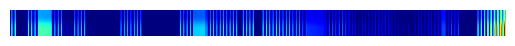

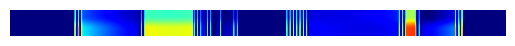

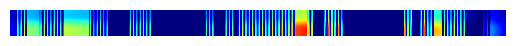

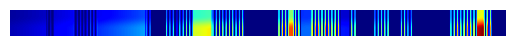

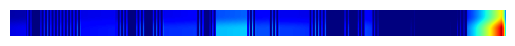

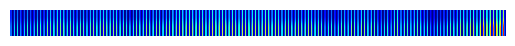

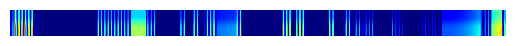

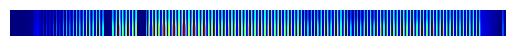

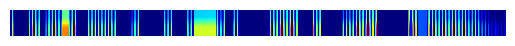

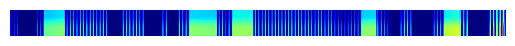

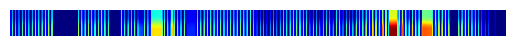

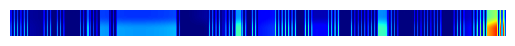

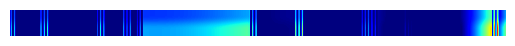

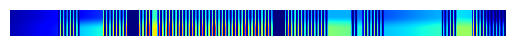

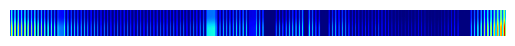

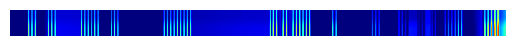

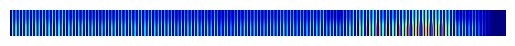

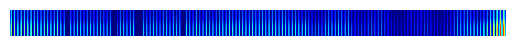

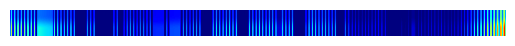

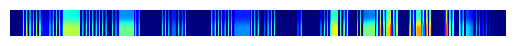

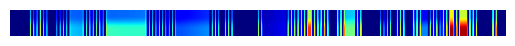

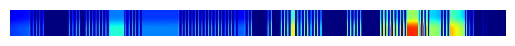

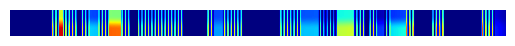

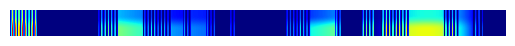

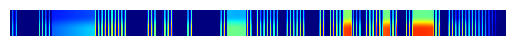

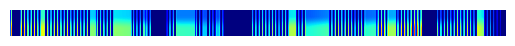

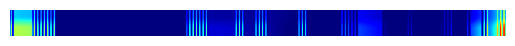

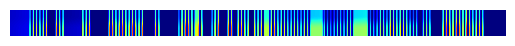

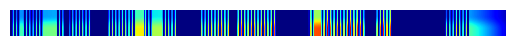

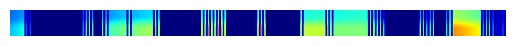

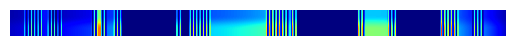

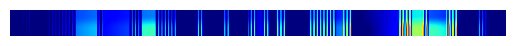

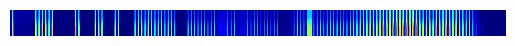

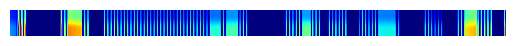

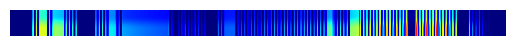

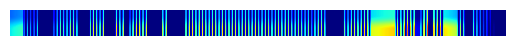

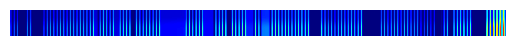

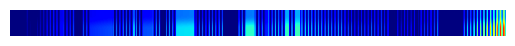

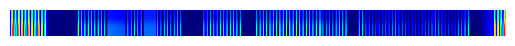

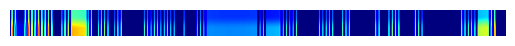

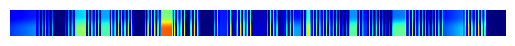

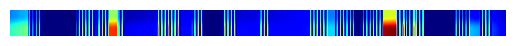

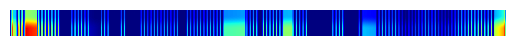

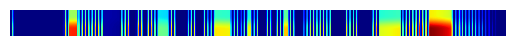

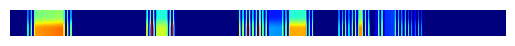

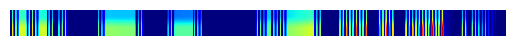

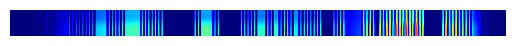

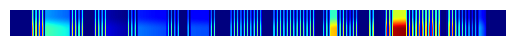

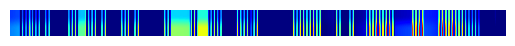

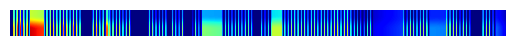

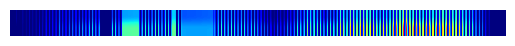

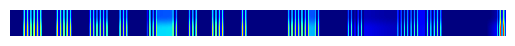

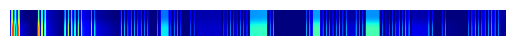

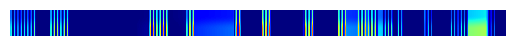

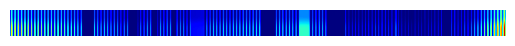

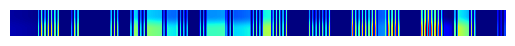

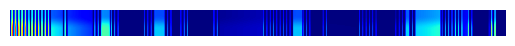

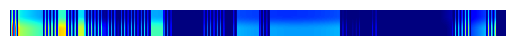

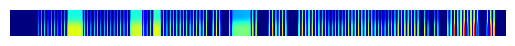

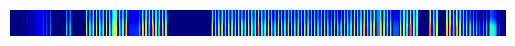

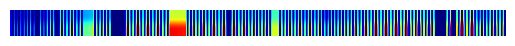

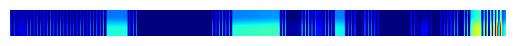

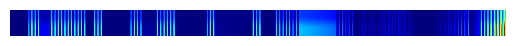

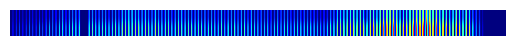

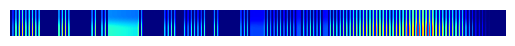

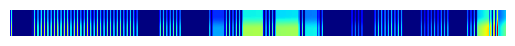

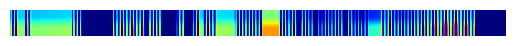

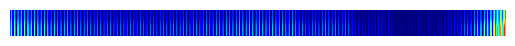

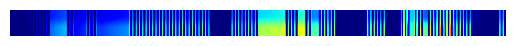

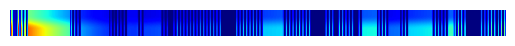

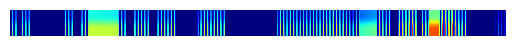

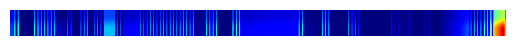

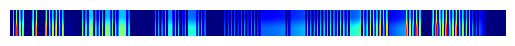

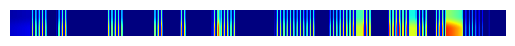

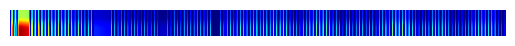

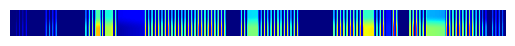

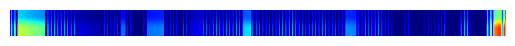

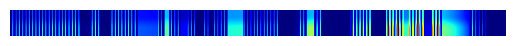

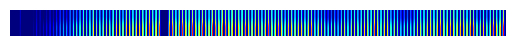

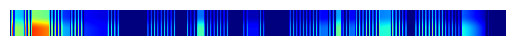

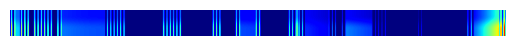

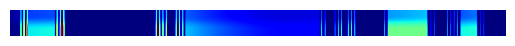

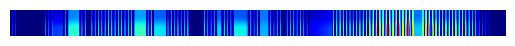

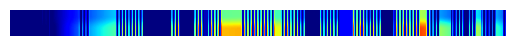

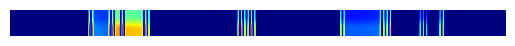

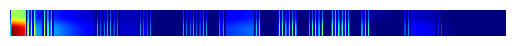

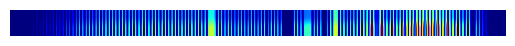

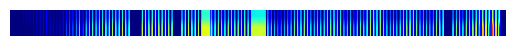

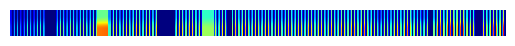

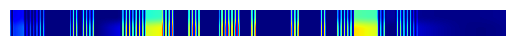

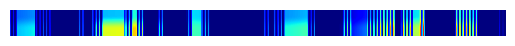

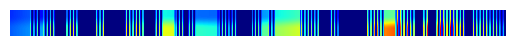

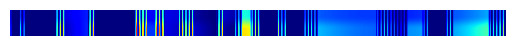

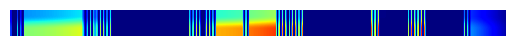

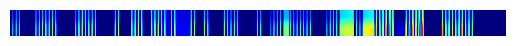

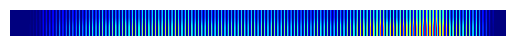

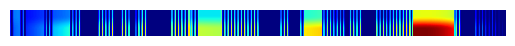

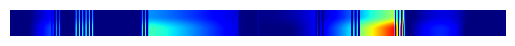

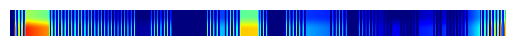

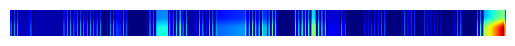

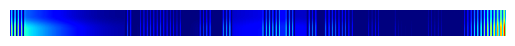

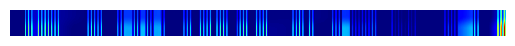

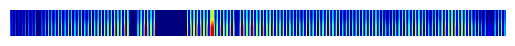

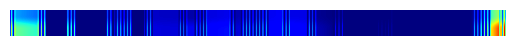

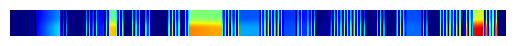

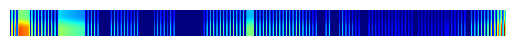

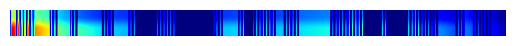

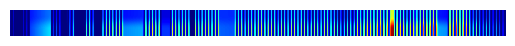

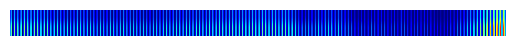

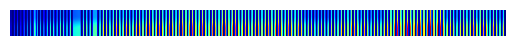

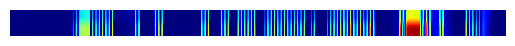

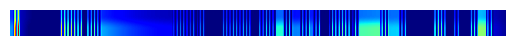

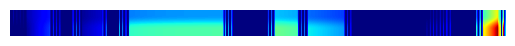

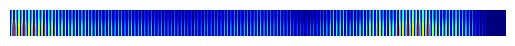

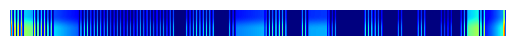

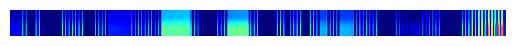

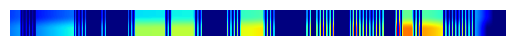

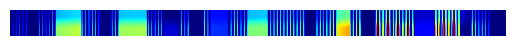

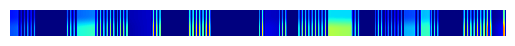

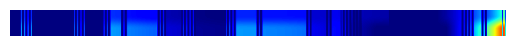

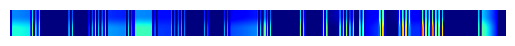

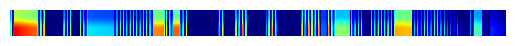

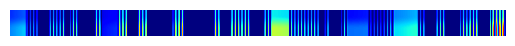

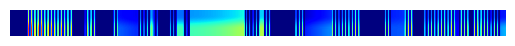

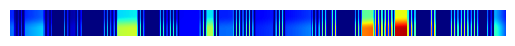

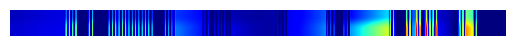

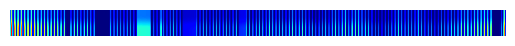

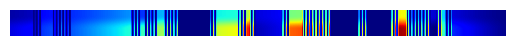

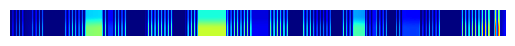

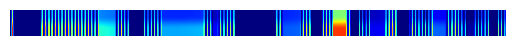

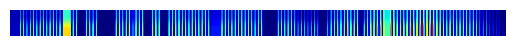

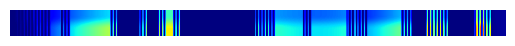

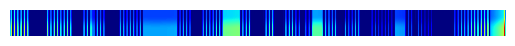

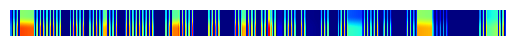

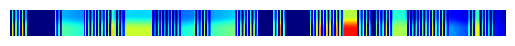

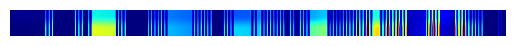

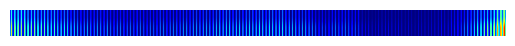

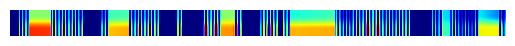

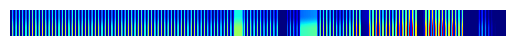

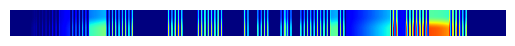

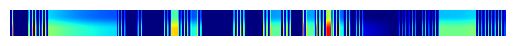

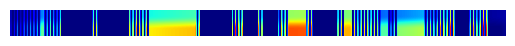

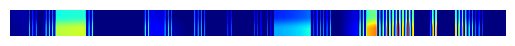

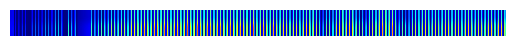

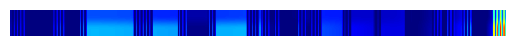

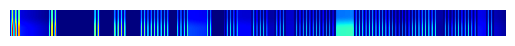

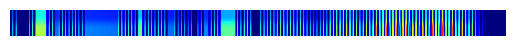

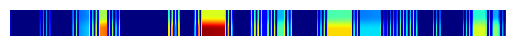

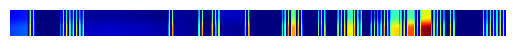

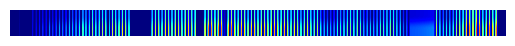

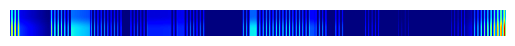

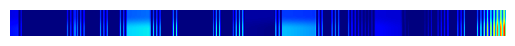

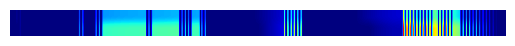

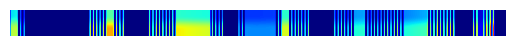

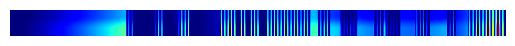

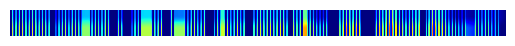

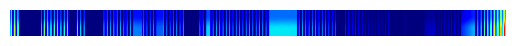

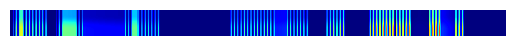

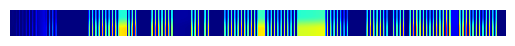

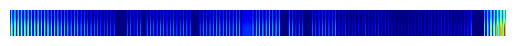

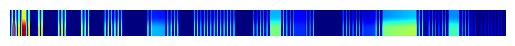

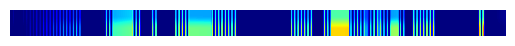

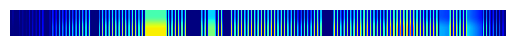

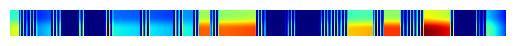

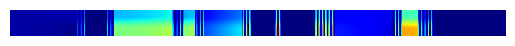

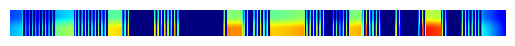

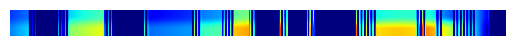

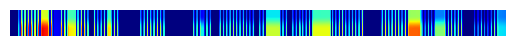

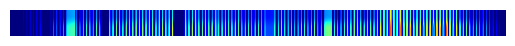

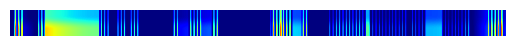

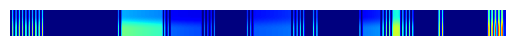

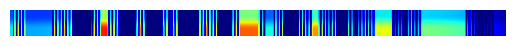

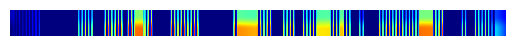

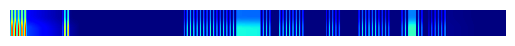

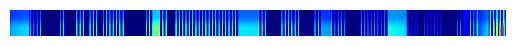

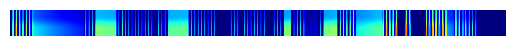

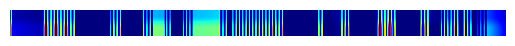

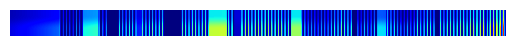

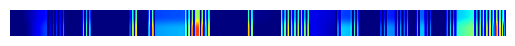

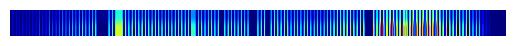

In [15]:
for i in tqdm(map):
    sample_img = np.load(i[0])
    sample_img = np.transpose(sample_img)
    img_8_750 = sample_img[[1,3],500:1250]
    distance_img = np.abs(img_8_750)
    filter_img = hpbp_filter_signal(distance_img, 0.004, 0.0001, 1)
    filter_img = filter_img.clip(min=0)
    fig = plt.figure()
        #ax.axis('off')
    ax = fig.add_subplot(111)
    ax.imshow(filter_img, cmap='jet')
    ax.set_aspect(20)
    ax.axis('off')
    name = i[0].split('.')[0]
    #print(name[10:])
    save_name = name + '.jpg'
    #print(save_name.split('\\.')[0])
    #print(i[1])
    #save_path = os.path.join("final_final_long",str(i[1]),save_name[10:])
    #print(save_path)
    #fig.savefig(save_path,bbox_inches='tight', pad_inches=0)

In [8]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
FINAL_split\110